# Part I - (Ford GoBike System Data)
## by (Eric Munene)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
  


## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
# load in the dataset into a pandas dataframe, print statistics
df_bike =pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
# print the first rows
df_bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#check the column dtype of the dataset
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
# Check null value for each column
df_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Cleaning
 #### Issue #1: Missing values in start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns

 ### Define: Drop the rows with missing values

 ### Code

In [8]:
#drop all the null values
df_bike.dropna(inplace=True)

### Test

In [9]:
# Check if null value for each column still exist
df_bike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Issue #2 start_time and end_time columns are in string (object)

### Define :Convert the columns to datetime

### Code

In [10]:
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

### Test

In [11]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

### Extract day and month from both the start_time and end_time

In [12]:
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_month'] = df_bike['start_time'].dt.month_name()
df_bike['start_hr'] = df_bike['start_time'].dt.hour
df_bike['start_hr'] = df_bike.start_hr.astype(str)


df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_month'] = df_bike['end_time'].dt.month_name()
df_bike['end_hr'] = df_bike['end_time'].dt.hour
df_bike['end_hr'] = df_bike.end_hr.astype(str)

df_bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,February,17,Friday,March,4


In [13]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_month       

### What is the structure of your dataset?
> > The dataset has 174952 entries with 22 columns after data wrangling.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the time of day or month were trips were most were taken. I will also be interested with the user type who took most trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start_time and end_time will enable be get the day and month after extraction. also using the user_type column will enable me know the most traveller user.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


## What is the average trip duration?

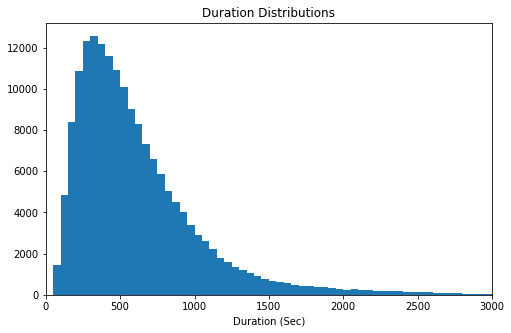

In [14]:
#plot the distribution of duration_sec
binsize = 50
bins = np.arange(50, df_bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.title('Duration Distributions');
plt.xlim([0, 3000]);

> The distribution of duration is right skewed.


## What is the ride frequency by days?

In [15]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_bike[var] = df_bike[var].astype(ordered_var)

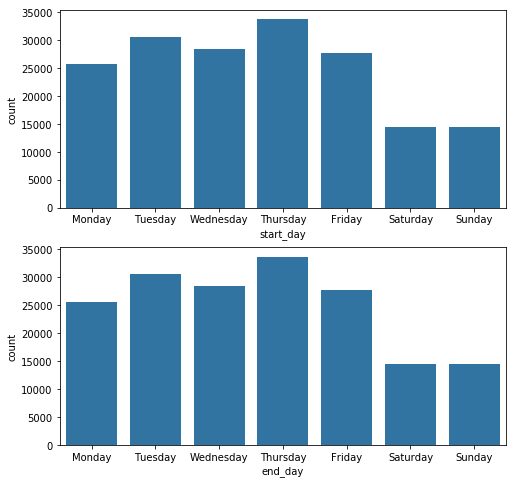

In [16]:
# ride frequency per days

fig, ax = plt.subplots(2, figsize = [8,8])

base_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'start_day', color = base_color,  ax = ax[0])
sb.countplot(data = df_bike, x = 'end_day', color = base_color,  ax = ax[1])



> Most trips were taken on Thursday, followed by Tuesday. Weekends have the lowest trip record.

## What is the ride frequency per hour?

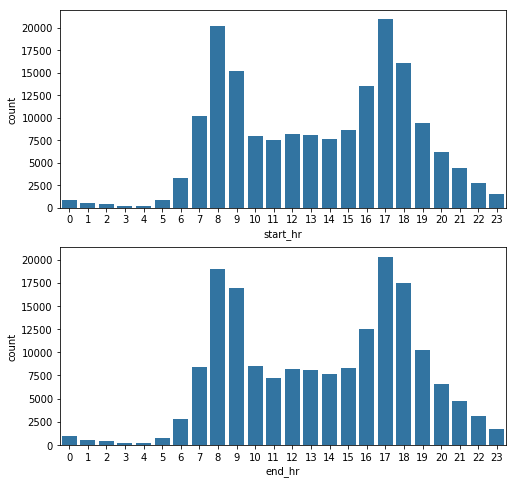

In [17]:
# ride frequency per hours

fig, ax = plt.subplots(2,figsize = [8,8])

base_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'start_hr', color = base_color,  ax = ax[0])
sb.countplot(data = df_bike, x = 'end_hr', color = base_color, ax = ax[1])

> The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to rush hours

## Which user_type is more frequent with the rides?

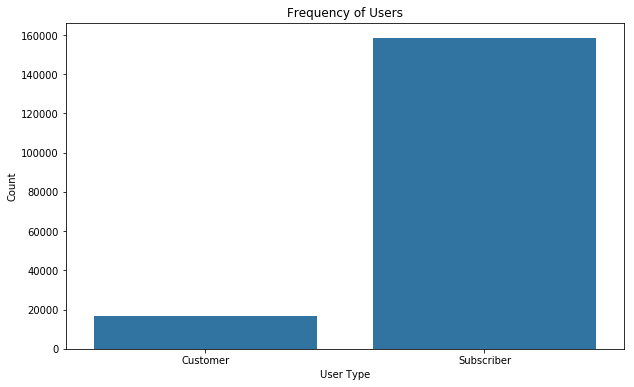

In [18]:
#plot the count of user_type
plt.figure(figsize=(10,6))
                   
sb.countplot(data=df_bike, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.title('Frequency of Users')
plt.ylabel('Count');

>  Subscribers are most user types in the dataset

## What gender make ups most the riders

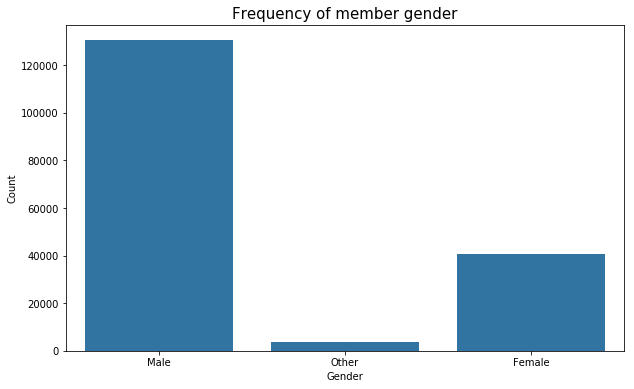

In [19]:
plt.figure(figsize=(10,6))
sb.countplot(data=df_bike, x='member_gender', color=base_color)

plt.title('Frequency of member gender', fontsize=15)
plt.xlabel('Gender');
plt.ylabel('Count');

 > Male are the most bike riders and others being the least

## Did users use bike share for all trips?

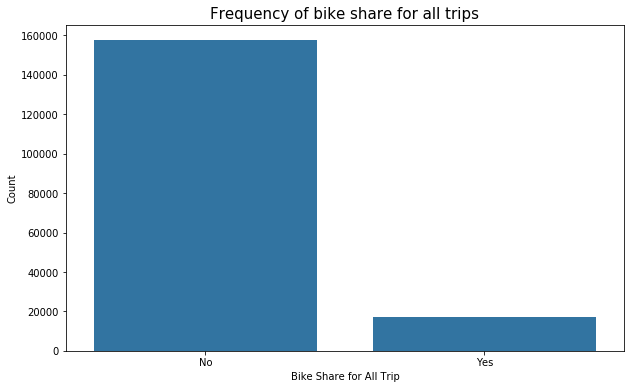

In [20]:
#plot the count of bike share for all trips
plt.figure(figsize=(10,6))
sb.countplot(data=df_bike, x='bike_share_for_all_trip', color=base_color);

plt.title('Frequency of bike share for all trips', fontsize=15)
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

 > Majority of the users did not use the bike share for all trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most trips were taken on Thursday, followed by Tuesday. Weekends have the lowest trip record.
> The number of trips peaked around 8-9am and 17-18pm during a da
> Majority of the users did not use the bike share for all trips with most of the riders being males in gender.
> most riders were subscribers compared to customers
> I did not do any transformation on the data.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> With interest in the hour, day and month, extraction took place from the start_time and end_time.This helped in the plot frequencies for the days and hours.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## What is the weekly frequency of riders between Customers and subscribers

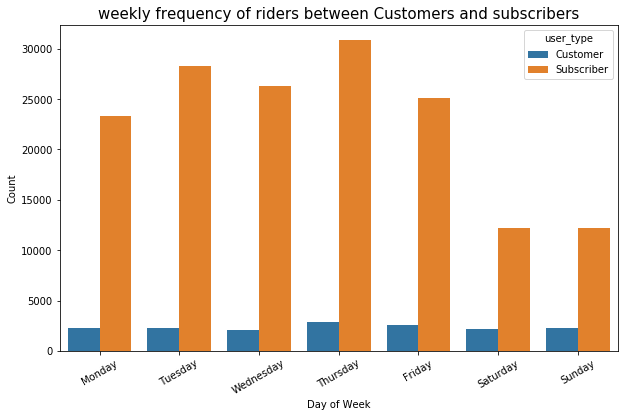

In [21]:
# plot the weekly usage between customers and subscribers
plt.figure(figsize=(10,6))
sb.countplot(data=df_bike, x='start_day', hue='user_type');
plt.xticks(rotation=30);

plt.title('weekly frequency of riders between Customers and subscribers', fontsize=15)
plt.xlabel('Day of Week');
plt.ylabel('Count');

 > There is more subscriber bike usage compared Customers, with most rides happening on tuesday and thursday. Least of rides occuring on the weekends

## What is the daily frequency of riders between Customers and subscribers

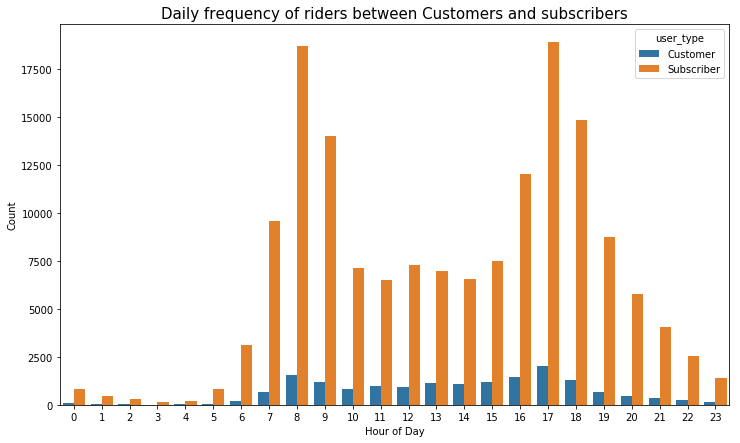

In [22]:
# plot the daily usage between customers and subscribers
plt.figure(figsize=(12,7))
sb.countplot(data=df_bike, x='start_hr', hue='user_type');

plt.title('Daily frequency of riders between Customers and subscribers', fontsize=15)
plt.xlabel('Hour of Day');
plt.ylabel('Count');

> Most of the Subscribers use the service at peak hour compared to customers

## What is the trip duration distribution between cutomers and subscribers

In [23]:
# add new column 'duration_minute' : convert the duration_sec to minute
df_bike['duration_minute'] = df_bike['duration_sec']/60
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr,duration_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,Thursday,February,17,Friday,March,8,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,Thursday,February,12,Friday,March,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,Thursday,February,17,Friday,March,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,Thursday,February,23,Friday,March,0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,Thursday,February,23,Friday,March,0,29.883333


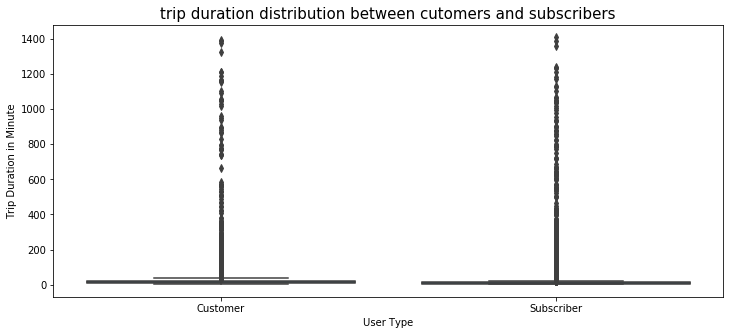

In [24]:
#plot trip duration distribution between cutomers and subscribers
plt.figure(figsize=(12,5))

sb.boxplot(data=df_bike, x='user_type', y='duration_minute', color=base_color);
plt.title('trip duration distribution between cutomers and subscribers', fontsize=15)
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

 >It seems that duration average for Customer is higher than Subscriber

## what is the user distribution according to gender?

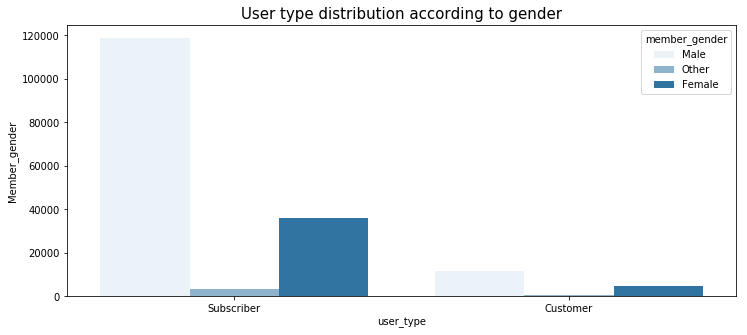

In [25]:
plt.figure(figsize=(12,5))
sb.countplot(data=df_bike, x='user_type', hue='member_gender',order=df_bike.user_type.value_counts().index, color=base_color);

plt.title('User type distribution according to gender',  fontsize=15)
plt.xlabel('user_type');
plt.ylabel('Member_gender');
plt.show()

>  Most subscribers and customers are males compared to other gender

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers have shorter duration time compared to customers thats correlation.
>most  males the subscribers and customers compared to any other gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most subscribers rides in the peak hours of the morning and evening
>Thursday has the highest rides

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

# How does the average trip duration vary in weekdays between customers and subscribers?

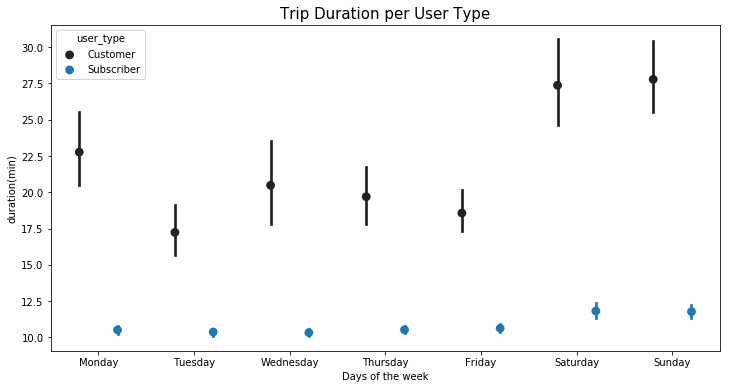

In [31]:
fig = plt.figure(figsize = [12,6])
ax = sb.pointplot(data = df_bike, x ='start_day', y = 'duration_minute', hue = 'user_type',
           color= base_color, linestyles = '', dodge = 0.4)
plt.xlabel('Days of the week')
plt.ylabel('duration(min)')
plt.title('Trip Duration per User Type', fontsize=15)

ax.set_yticklabels([],minor = True);

 >  Subscribers have short trip duration compared to customers on each day of the week.
 > Both user_type have increase in trip duration on weekends that is Saturday and Sunday

##  How does trip duration vary across member_gender and bike share for all trip?


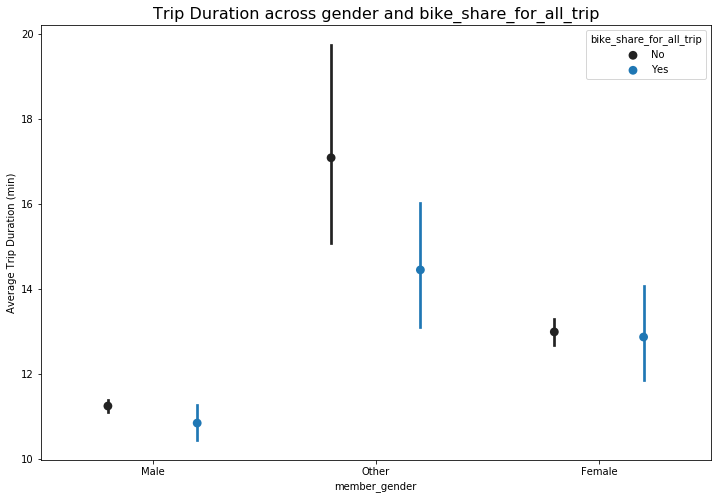

In [32]:
fig = plt.figure(figsize = [12,8])
ax = sb.pointplot(data =df_bike, x ='member_gender', y = 'duration_minute', hue = 'bike_share_for_all_trip',
           color=base_color, linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip',fontsize=16)
plt.ylabel('Average Trip Duration (min)')

ax.set_yticklabels([],minor = True)
plt.show();

> other gender has long trip duration  for both no and yes bike sharing , followed by female and males

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> other gender has more trip duration duration
>bikes with bike sharing have lower trip duration than non bike sharing
> Subscribers have lower trip duration than customers
> Subscribers have a steady flow of trip duration across the week
### Were there any interesting or surprising interactions between features?

>  it was suprising that other gender has longer trip duration than males and female

## Conclusions
* other gender has long trip duration for both no and yes bike sharing , followed by female and males
* Most trips were taken on Thursdays and Tuesdays
* Weekends have the least trip records
* Customers spend more duration than subscribers
* trip durations on weekends are longer than on other weekdays
* Customers travel for longer durations regardless of the day of the week as compared to subscribers.
* Most subscribers rides in the peak hours of the morning and evening Thursday has the highest rides
* Majority of the users did not use the bike share for all trips
